In [1]:
# IMPORTING LIBRARIES
import pandas as pd

In [2]:
# READING THE FILE
netflix = pd.read_csv("netflixData.csv")

In [3]:
# GETTING THE SHAPE OF THE DATAFRAME
netflix.shape

(5967, 13)

In [4]:
# LOOKING UP THE DATA
netflix.head()

,Show Id,Title,Description,Director,Genres,Cast,Production Country,Release Date,Rating,Duration,Imdb Score,Content Type,Date Added
0,cc1b6ed9-cf9e-4057-8303-34577fb54477,(Un)Well,This docuseries takes a deep dive into the luc...,NaN,Reality TV,NaN,United States,2020.0,TV-MA,1 Season,6.6/10,TV Show,NaN
1,e2ef4e91-fb25-42ab-b485-be8e3b23dedb,#Alive,"As a grisly virus rampages a city, a lone man ...",Cho Il,"Horror Movies, International Movies, Thrillers","Yoo Ah-in, Park Shin-hye",South Korea,2020.0,TV-MA,99 min,6.2/10,Movie,"September 8, 2020"
2,b01b73b7-81f6-47a7-86d8-acb63080d525,#AnneFrank - Parallel Stories,"Through her diary, Anne Frank's story is retol...","Sabina Fedeli, Anna Migotto","Documentaries, International Movies","Helen Mirren, Gengher Gatti",Italy,2019.0,TV-14,95 min,6.4/10,Movie,"July 1, 2020"
3,b6611af0-f53c-4a08-9ffa-9716dc57eb9c,#blackAF,Kenya Barris and his family navigate relations...,NaN,TV Comedies,"Kenya Barris, Rashida Jones, Iman Benson, Genn...",United States,2020.0,TV-MA,1 Season,6.6/10,TV Show,NaN
4,7f2d4170-bab8-4d75-adc2-197f7124c070,#cats_the_mewvie,This pawesome documentary explores how our fel...,Michael Margolis,"Documentaries, International Movies",NaN,Canada,2020.0,TV-14,90 min,5.1/10,Movie,"February 5, 2020"


In [5]:
# HAVING A LOOK ON THE COLUMNS
netflix.columns

Index(['Show Id', 'Title', 'Description', 'Director', 'Genres', 'Cast',
       'Production Country', 'Release Date', 'Rating', 'Duration',
       'Imdb Score', 'Content Type', 'Date Added'],
      dtype='object')

In [6]:
# INFORMATION ABOUT THE DATAFRAME
netflix.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5967 entries, 0 to 5966
Data columns (total 13 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Show Id             5967 non-null   object 
 1   Title               5967 non-null   object 
 2   Description         5967 non-null   object 
 3   Director            3903 non-null   object 
 4   Genres              5967 non-null   object 
 5   Cast                5437 non-null   object 
 6   Production Country  5408 non-null   object 
 7   Release Date        5964 non-null   float64
 8   Rating              5963 non-null   object 
 9   Duration            5964 non-null   object 
 10  Imdb Score          5359 non-null   object 
 11  Content Type        5967 non-null   object 
 12  Date Added          4632 non-null   object 
dtypes: float64(1), object(12)
memory usage: 606.2+ KB


In [7]:
# GETTING THE PERCENTAGE OF THE NULL VALUES PRESENT IN THE DATAFRAME
netflix.isnull().sum()/netflix.shape[0]*100

Show Id                0.000000
Title                  0.000000
Description            0.000000
Director              34.590246
Genres                 0.000000
Cast                   8.882185
Production Country     9.368192
Release Date           0.050277
Rating                 0.067035
Duration               0.050277
Imdb Score            10.189375
Content Type           0.000000
Date Added            22.373052
dtype: float64

In [8]:
# FILLING THE NULL VALUES
x = ["Director", "Cast", "Production Country"]
for fillings in x:
    netflix[fillings].fillna("Unavaliable", inplace= True)

In [9]:
# HAVING A LOOK ON THE DIFFERNECE
netflix.isnull().sum()/netflix.shape[0]*100

Show Id                0.000000
Title                  0.000000
Description            0.000000
Director               0.000000
Genres                 0.000000
Cast                   0.000000
Production Country     0.000000
Release Date           0.050277
Rating                 0.067035
Duration               0.050277
Imdb Score            10.189375
Content Type           0.000000
Date Added            22.373052
dtype: float64

In [10]:
# DROPING SUM NULL VALUES AND NON REQUIRED COLUMNS
netflix.dropna(subset=["Release Date", "Rating", "Duration", "Imdb Score"], inplace = True)
netflix.drop(["Date Added"], axis= 1 , inplace = True)

In [11]:
# HAVING A LOOK ON THE PERCENTAGE AGAIN 
netflix.isnull().sum()/netflix.shape[0]*100

Show Id               0.0
Title                 0.0
Description           0.0
Director              0.0
Genres                0.0
Cast                  0.0
Production Country    0.0
Release Date          0.0
Rating                0.0
Duration              0.0
Imdb Score            0.0
Content Type          0.0
dtype: float64

In [12]:
# MODIFYING SOME VALUES TO GET BETTER RESULTS WHEN FURTHER PROCESSING
netflix["Imdb Score"] = netflix["Imdb Score"].str.replace("/10", "")
netflix["Imdb Score"] = netflix["Imdb Score"].apply(pd.to_numeric)

In [13]:
# CHANGING THE NAMES OF THE COLUMNS AND CHANGING THE DATA TYPE TO MAKE IT MORE PRECISE
netflix = netflix.rename(columns={"Release Date" : "Release Year"})
netflix["Release Year"]=netflix["Release Year"].astype(int)

In [14]:
# HAVING A LOOKUP AGAIN
netflix.head()

,Show Id,Title,Description,Director,Genres,Cast,Production Country,Release Year,Rating,Duration,Imdb Score,Content Type
0,cc1b6ed9-cf9e-4057-8303-34577fb54477,(Un)Well,This docuseries takes a deep dive into the luc...,Unavaliable,Reality TV,Unavaliable,United States,2020,TV-MA,1 Season,6.6,TV Show
1,e2ef4e91-fb25-42ab-b485-be8e3b23dedb,#Alive,"As a grisly virus rampages a city, a lone man ...",Cho Il,"Horror Movies, International Movies, Thrillers","Yoo Ah-in, Park Shin-hye",South Korea,2020,TV-MA,99 min,6.2,Movie
2,b01b73b7-81f6-47a7-86d8-acb63080d525,#AnneFrank - Parallel Stories,"Through her diary, Anne Frank's story is retol...","Sabina Fedeli, Anna Migotto","Documentaries, International Movies","Helen Mirren, Gengher Gatti",Italy,2019,TV-14,95 min,6.4,Movie
3,b6611af0-f53c-4a08-9ffa-9716dc57eb9c,#blackAF,Kenya Barris and his family navigate relations...,Unavaliable,TV Comedies,"Kenya Barris, Rashida Jones, Iman Benson, Genn...",United States,2020,TV-MA,1 Season,6.6,TV Show
4,7f2d4170-bab8-4d75-adc2-197f7124c070,#cats_the_mewvie,This pawesome documentary explores how our fel...,Michael Margolis,"Documentaries, International Movies",Unavaliable,Canada,2020,TV-14,90 min,5.1,Movie


In [15]:
# ANALYSING THE CHANGES
netflix.info()

<class 'pandas.core.frame.DataFrame'>
Index: 5359 entries, 0 to 5966
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Show Id             5359 non-null   object 
 1   Title               5359 non-null   object 
 2   Description         5359 non-null   object 
 3   Director            5359 non-null   object 
 4   Genres              5359 non-null   object 
 5   Cast                5359 non-null   object 
 6   Production Country  5359 non-null   object 
 7   Release Year        5359 non-null   int32  
 8   Rating              5359 non-null   object 
 9   Duration            5359 non-null   object 
 10  Imdb Score          5359 non-null   float64
 11  Content Type        5359 non-null   object 
dtypes: float64(1), int32(1), object(10)
memory usage: 523.3+ KB


CLEANING FINSHED FOR NOW

Visualisation Starts

In [16]:
# IMPORTING LIBRARIS FOR VISUALISTAON
import matplotlib.pyplot as plt
import seaborn as sns

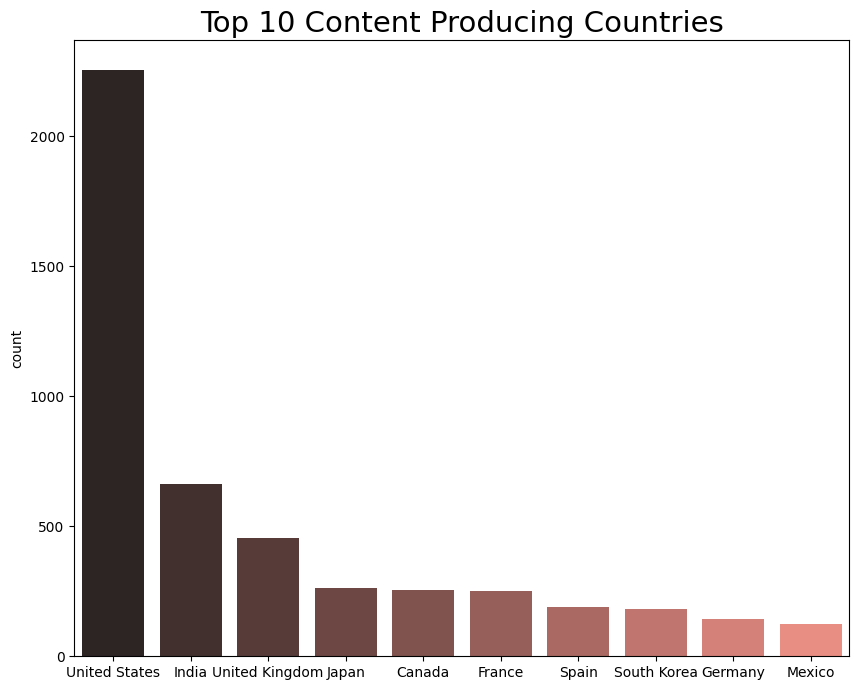

In [17]:
Countries = netflix.set_index('Title')["Production Country"].str.split(', ', expand=True).stack().reset_index(level=1, drop=True)

# REMOVE ROWS WHERE THE 'Production Country' IS 'Production Country unavailable'.
Countries = Countries[Countries != 'Unavaliable']

# CREATE A FIGURE WITH A SPECIFIED SIZE
plt.figure(figsize=(10, 8))

# CREATE A COUNT PLOT USING SEABORN
# 'x' SPECIFIES THE DATA FOR THE X-AXIS.
# 'order' SETS THE ORDER OF THE BARS BASED ON VALUE COUNTS AND SELECTS THE TOP 10.
# 'palette' SETS THE COLOR PALETTE FOR THE PLOT.
g = sns.countplot(x=Countries, order=Countries.value_counts().index[:10], palette='dark:salmon')

# ADD A TITLE TO THE PLOT
plt.title('Top 10 Content Producing Countries', fontsize=21)

# DISPLAY THE PLOT
plt.show()

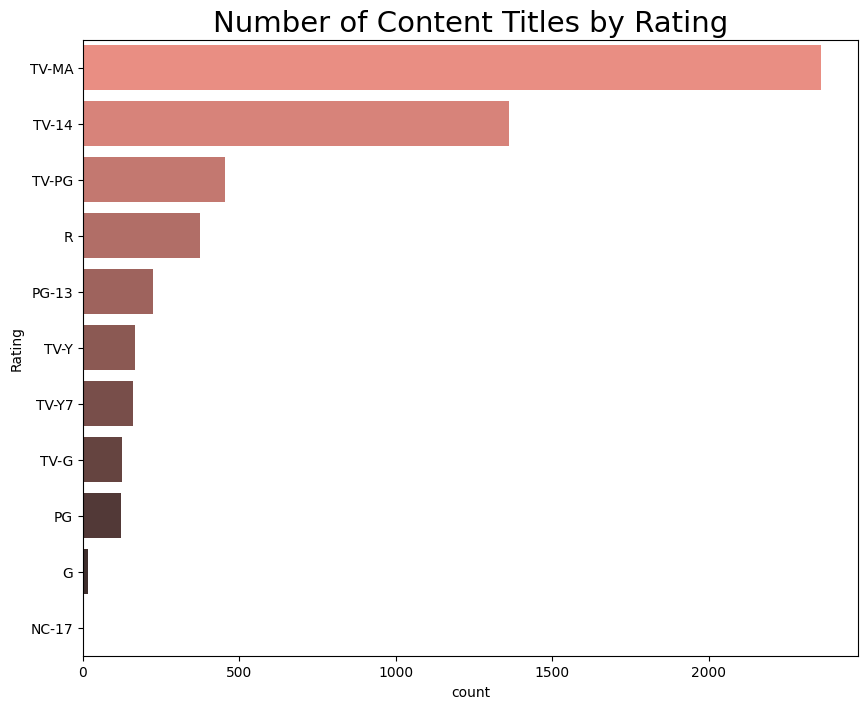

In [18]:
plt.figure(figsize=(10, 8))
sns.countplot(y='Rating', data=netflix, order=netflix.Rating.value_counts().index.to_list(), palette='dark:salmon_r')
plt.title('Number of Content Titles by Rating', fontsize=21)
plt.show()

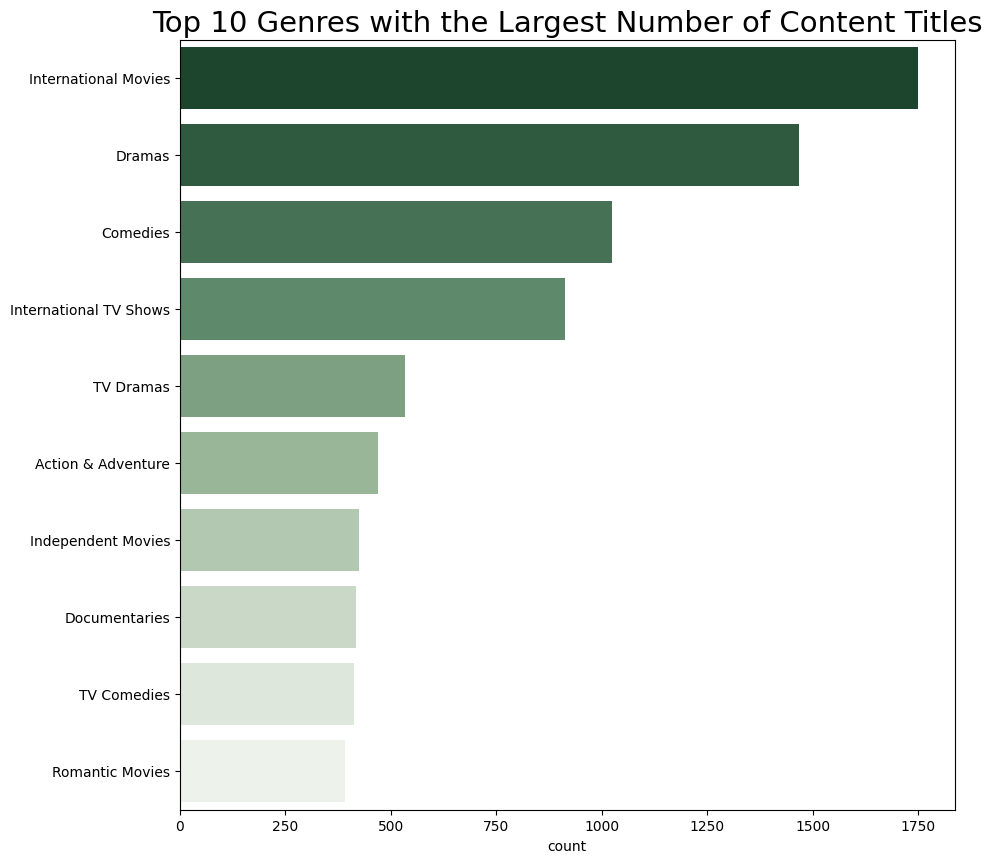

In [19]:
top_genres = netflix.set_index('Title').Genres.str.split(', ', expand=True).stack().reset_index(level=1, drop=True)
plt.figure(figsize=(10, 10))
sns.countplot(y=top_genres, order=top_genres.value_counts().index.to_list()[:10], palette='Greens_r', saturation=.4)
plt.title('Top 10 Genres with the Largest Number of Content Titles', fontsize=21)
plt.show()

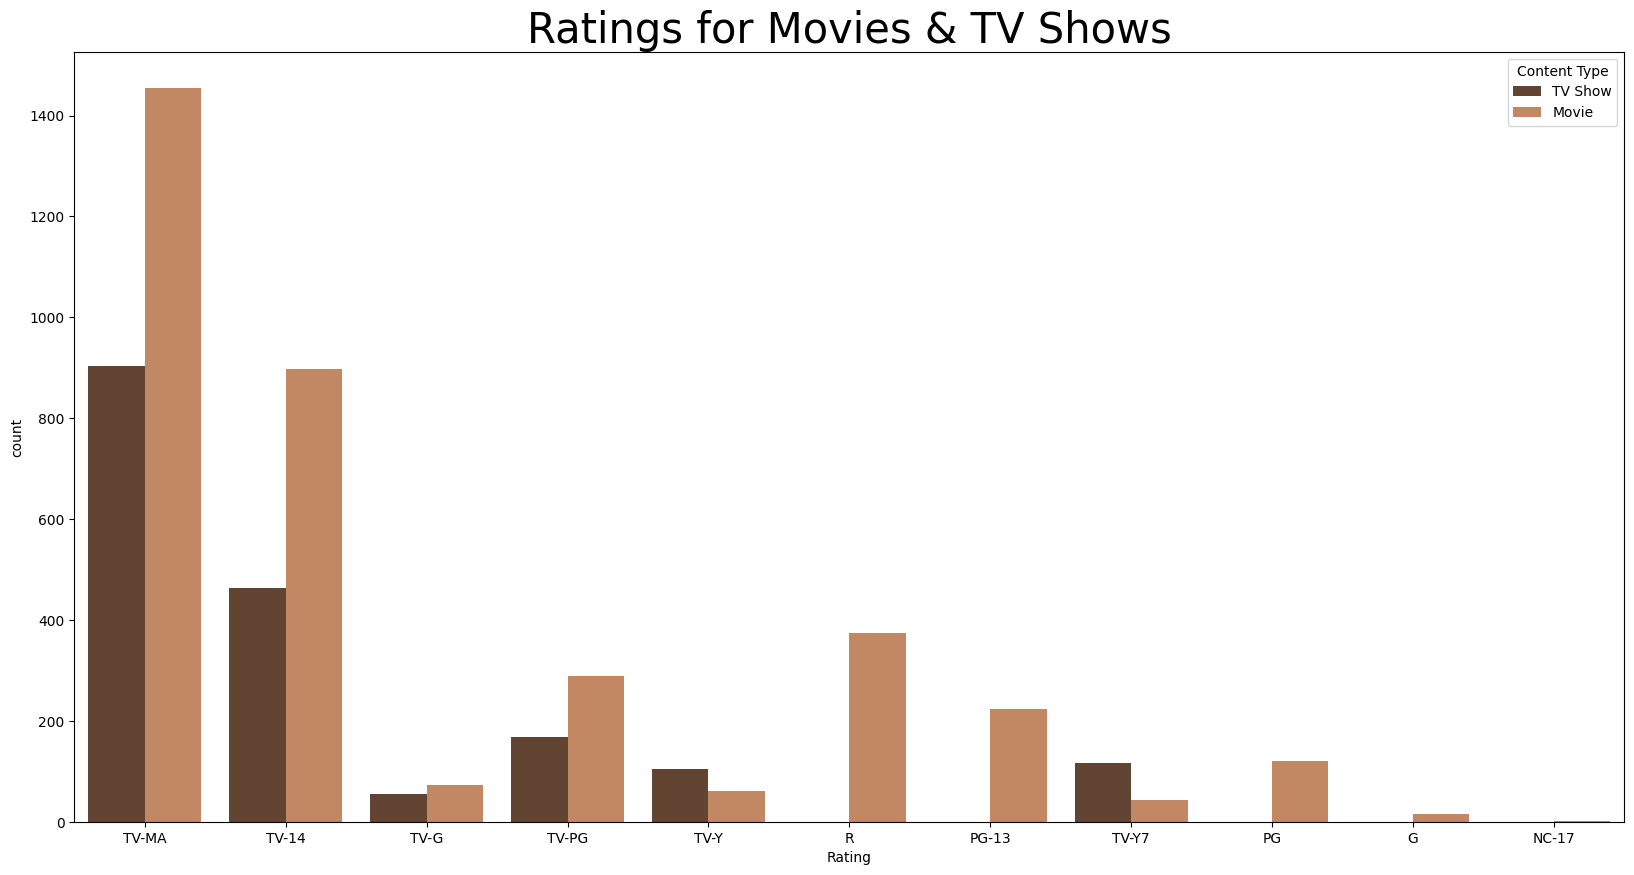

In [20]:
plt.figure(figsize=(20, 10))
g = sns.countplot(x=netflix["Rating"], hue=netflix["Content Type"], palette="copper")
plt.title("Ratings for Movies & TV Shows", fontsize=30)
plt.show()

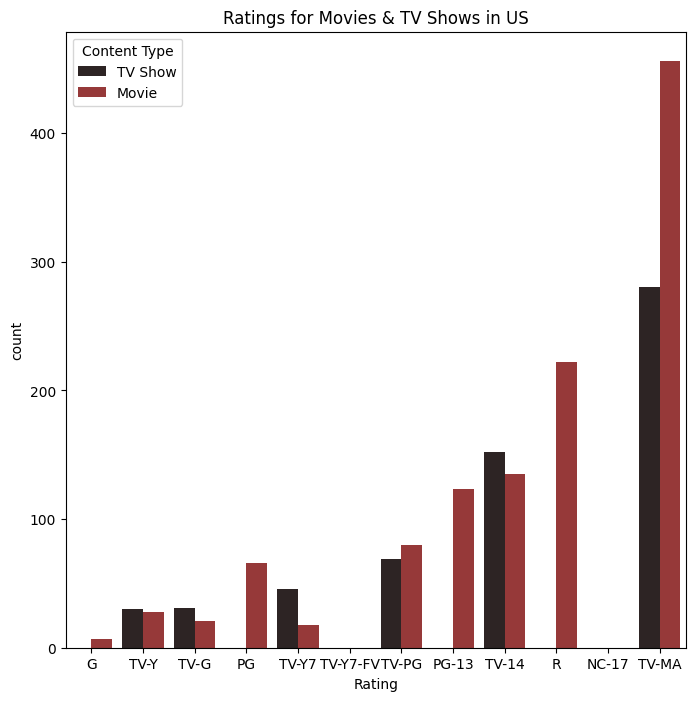

In [21]:
US = netflix[netflix["Production Country"] == "United States"]
order = ['G', 'TV-Y', 'TV-G', 'PG', 'TV-Y7', 'TV-Y7-FV', 'TV-PG', 'PG-13', 'TV-14', 'R', 'NC-17', 'TV-MA']
plt.figure(figsize=(8, 8))
g = sns.countplot(x=US["Rating"], hue=US["Content Type"], order=order, palette="dark:brown")
plt.title("Ratings for Movies & TV Shows in US")
plt.show()

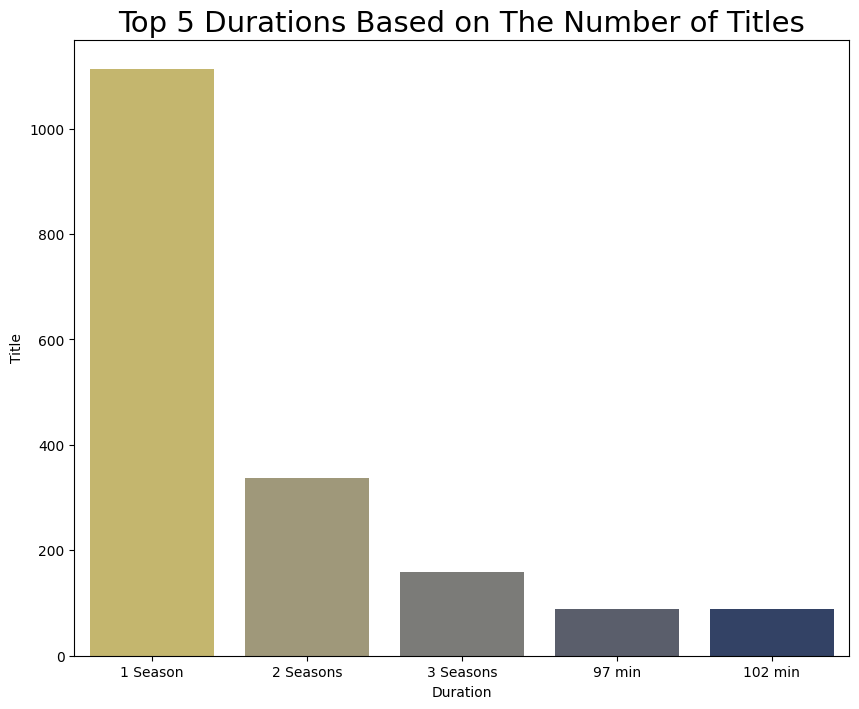

In [22]:
plt.figure(figsize=(10,8))
netflix_duration = netflix['Duration'].value_counts()
netflix_duration = pd.DataFrame(netflix_duration).reset_index()
netflix_duration.columns = ['Duration','Title']
sns.barplot(x = 'Duration',y = 'Title', data=netflix_duration.head(5), palette="cividis_r")
plt.title('Top 5 Durations Based on The Number of Titles', fontsize=21)
plt.show()

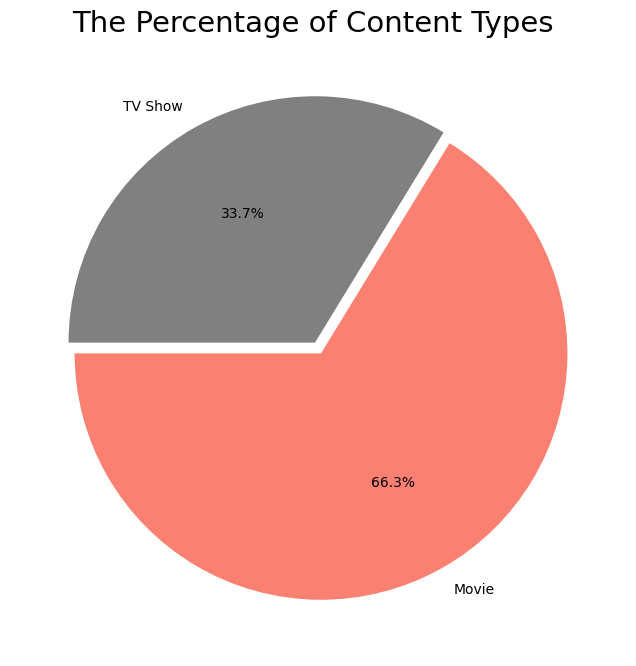

In [23]:
plt.figure(figsize=(12,8))
plt.title("The Percentage of Content Types ", fontsize=21)
g = plt.pie(netflix["Content Type"].value_counts(),explode=(0.025,0.025), labels=netflix["Content Type"].value_counts().index, colors=['salmon','grey'],  autopct='%1.1f%%', startangle=180)
plt.show()

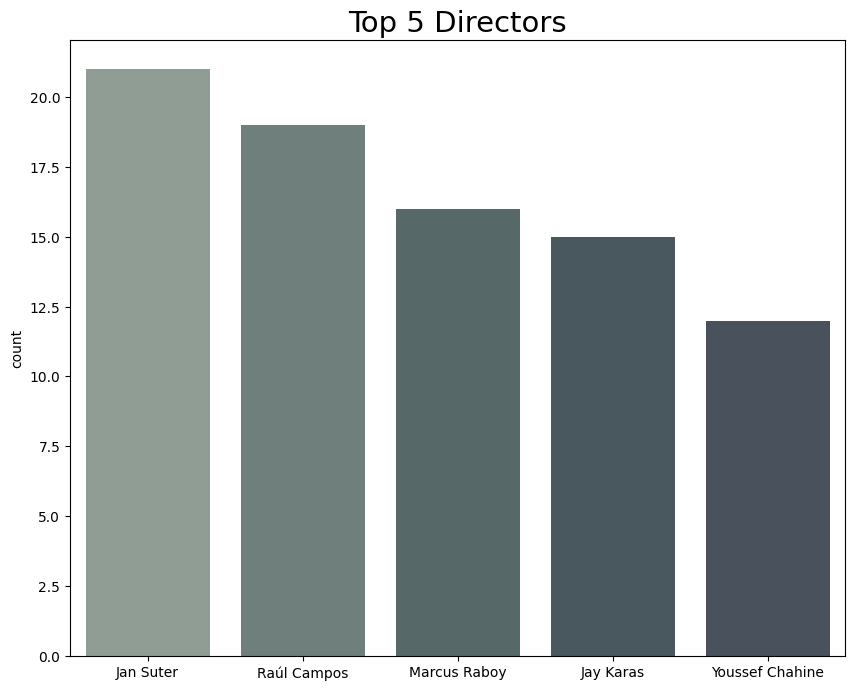

In [24]:
plt.figure(figsize=(10,8))
netflix_directors = netflix[netflix.Director != "Unavaliable"].set_index('Title').Director.str.split(', ', expand=True).stack().reset_index(level=1, drop=True)
sns.countplot(x = netflix_directors, order=netflix_directors.value_counts().index[:5], palette='crest', saturation=.2)
plt.title('Top 5 Directors', fontsize=21)
plt.show()